<a href="https://colab.research.google.com/github/ANDRERAIMUNDO/atividade-04-PPGCC-2025_1/blob/main/Atividade_04_PPGCC_2025_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Questão A

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

p-value: 0.000000


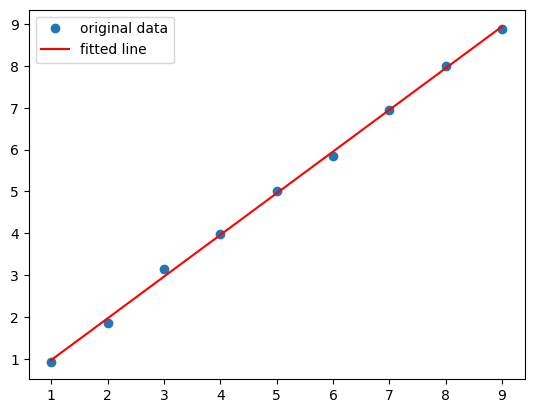

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rng = np.random.default_rng()
x = np.linspace(1, 9, 9)
y = x + np.random.normal(loc=0, scale=0.1, size=9)
res = stats.linregress(x, y)
res = stats.linregress(x,y)

print(f"p-value: {res.pvalue:.6f}")
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

p-value: 0.765107


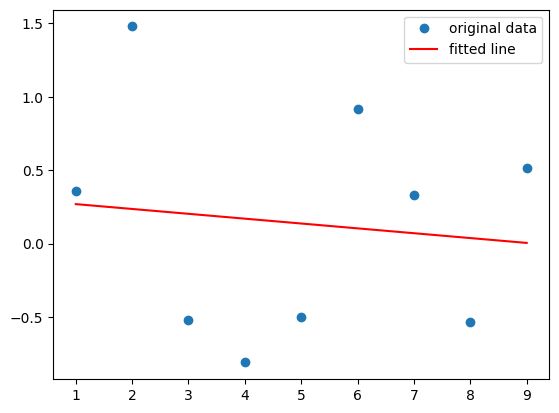

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rng = np.random.default_rng()
x = np.linspace(1, 9, 9)
y = np.random.normal(loc=0, scale=1, size=9)
res = stats.linregress(x, y)
res = stats.linregress(x,y)

print(f"p-value: {res.pvalue:.6f}")
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()